## Demo

In [1]:
import jjs9
import easyaccess as ea
import requests
import os
import api
jjs9.libinit(root='http://141.142.236.167:8000/user/mcarras2/tree/') # This is needed to load js and css into the notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Get data locally using cutouts API (2 steps, submit job and get results)

In [2]:
C = api.DesCutouts( root_url='http://desdev2.cosmology.illinois.edu/')

In [3]:
# RA,DEC example
ra=[29.47087800]
dec=[-41.54843300]

In [4]:
C.get_token()

Token created, expiration is 24 hours


'c4ac2dc57ba635a9368f6d75f47b7a4026fba871'

In [5]:
C.cut(ra=ra,dec=dec, xsize=4, ysize=4, wait=True)

Job b4a40a56-dc66-4f9c-a6f7-ff08a49e0ddc submitted.
Job completed.


In [6]:
C.status

'Job completed.'

In [7]:
C.get_files(folder='example')

6 files copied to local server


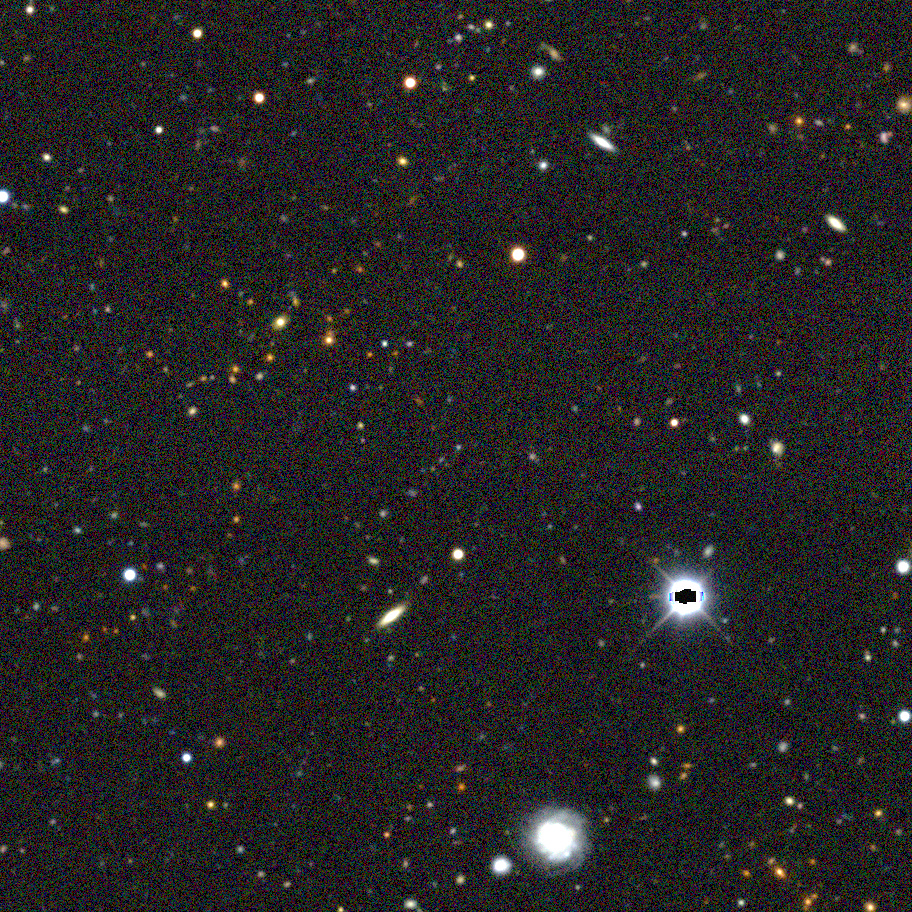

In [8]:
C.show_png(folder='example')

## jjs9 Class 

In [11]:
import jjs9
J = jjs9.Js9()

In [21]:
J.NewDiv()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Display id = 5a5d169c656142e08fab78be1ca8c398JS9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
J.Load('example/DESJ015753.0-413254.4_i.fits') # Load a fits file

<IPython.core.display.Javascript object>

In [15]:
con=ea.connect()

Connecting to DB ** dessci ** ...


In [16]:
x1,y0=J.wcs_pix2world(0,0,1)
x1=x1.tolist()
y0=y0.tolist()
x0,y1=J.wcs_pix2world(1140,1140,1)
x0=x0.tolist()
y1=y1.tolist()

In [17]:
q='select ra,dec from Y1A1_COADD_OBJECTS where RA between %f and %f and DEC between %f and %f'
q=q % ( x0, x1, y0,y1)
q

'select ra,dec from Y1A1_COADD_OBJECTS where RA between 29.404156 and 29.515410 and DEC between -41.581723 and -41.498429'

In [18]:
df = con.query_to_pandas(q)

In [19]:
df.tail(3)

,RA,DEC
565,29.504209,-41.552598
566,29.472271,-41.548650
567,29.476684,-41.540883


In [23]:
ra=df.RA.values
dec=df.DEC.values
x,y=J.wcs_world2pix(ra,dec,1)
radius=[10]*len(x)
J.AddRegions(x=x,y=y,radius=radius)

<IPython.core.display.Javascript object>